# Introduction:


When we use a linear regression to answer inferential questions, i.e. as a tool to answer questions about some hypothetical population we need to make those assumptions about the populations.

We explore a data set called "prestige".

Dependent variable and the target is the prestige of a job.
Independent variables are income and education. There is also other ones but we exclude it from this part.

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
%matplotlib inline


/home/ghazal/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Exploring data:

In [2]:
prestige = pd.read_csv("Duncan.csv")
prestige.head()

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


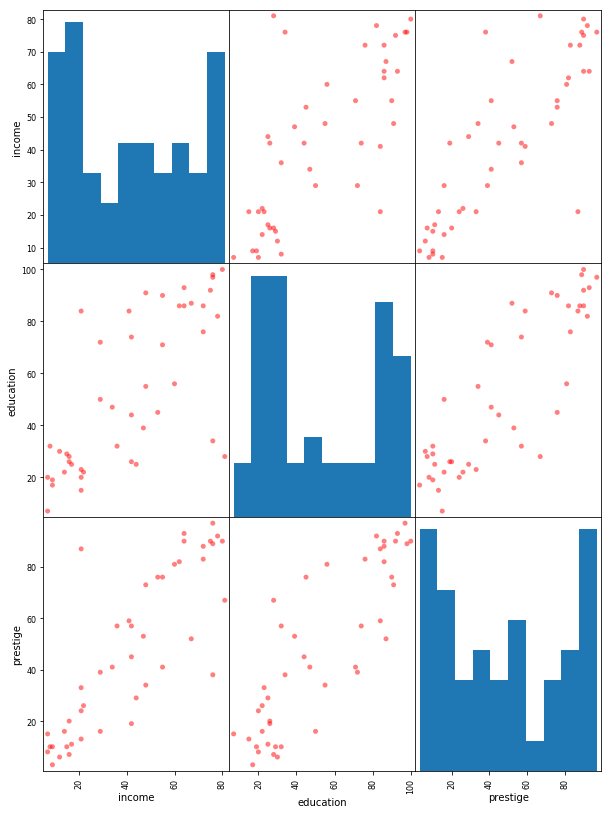

In [3]:
scatter_matrix(prestige, figsize = (10,14), s=100, color = 'red')
plt.show()

In [4]:
prestige.describe()

,income,education,prestige
count,45.000000,45.000000,45.000000
mean,41.866667,52.555556,47.688889
std,24.435072,29.760831,31.510332
min,7.000000,7.000000,3.000000
25%,21.000000,26.000000,16.000000
50%,42.000000,45.000000,41.000000
75%,64.000000,84.000000,81.000000
max,81.000000,100.000000,97.000000


In [5]:
prestige.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45 non-null     object
 1   type        45 non-null     object
 2   income      45 non-null     int64 
 3   education   45 non-null     int64 
 4   prestige    45 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ KB


In [6]:
prestige.groupby('type')['prestige'].max()

type
bc      67
prof    97
wc      52
Name: prestige, dtype: int64

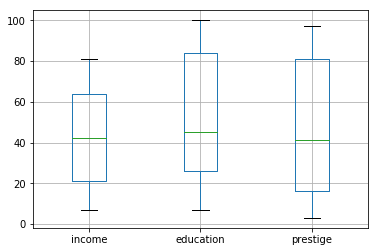

In [7]:
boxplot = prestige.boxplot(column = ['income', 'education', 'prestige'])

# Fit a linear regression:

In [9]:
from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Exponential

modelI = GLM(family=Gaussian())
modelI.fit(prestige, formula='prestige ~ income')

modelI.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                  2.46            5.19
income                     1.08            0.11


In [10]:
modelE = GLM(family=Gaussian())
modelE.fit(prestige, formula='prestige ~ education')

modelE.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                  0.28            5.09
education                  0.90            0.08


In [11]:
modelIE = GLM(family=Gaussian())
modelIE.fit(prestige, formula='prestige ~ income + education')

modelIE.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                 -6.06            4.27
income                     0.60            0.12
education                  0.55            0.10


In [12]:
names = modelIE.X_names
p_values = modelIE.p_values_

print("Predictor            p-value")
print("-"*30)
for name, p in zip(names, p_values):
    print(f"{name :<20} {p:2.3f}")

Predictor            p-value
------------------------------
Intercept            0.156
income               0.000
education            0.000
